In [2]:
#!pip install scikit-fuzzy matplotlib numpy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

## Universos, membresías y operaciones

### Definir universo y funciones de pertenencia

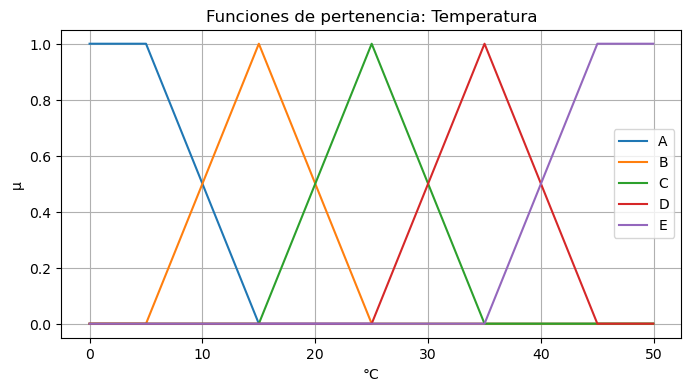

In [23]:
# Universo de la variable TEMPERATURA (°C)
# Es muy importante esta lina, tambien define la cantidad de puntos de discretización (1000) en este caso 50 / 1000 = 0.05, variar este valor resultante entre 500 o 2000
x_temp = np.arange(0, 50, 0.05)  # 0 a 50 °C

# Conjuntos difusos (funciones de pertenencia)
A  = fuzz.trapmf(x_temp, [0, 0, 5, 15]) # trapezoidal
B  = fuzz.trimf(x_temp, [5, 15, 25])   #
C  = fuzz.trimf(x_temp, [15, 25, 35])   
D  = fuzz.trimf(x_temp, [25, 35, 45])   
E  = fuzz.trimf(x_temp, [26, 40, 40])   
E  = fuzz.trapmf(x_temp, [35, 45, 50, 50])

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(x_temp, A, label='A')
plt.plot(x_temp, B, label='B')
plt.plot(x_temp, C, label='C')
plt.plot(x_temp, D, label='D')
plt.plot(x_temp, E, label='E')
plt.title('Funciones de pertenencia: Temperatura')
plt.xlabel('°C'); plt.ylabel('μ')
plt.ylim(-0.05, 1.05); plt.legend(); plt.grid(True)
plt.show()


### Evaluar pertenencia de un valor puntual

In [4]:
#punto 1.b
# Definimos un umbral de pertenencia 
umbral = 0.1

# Contamos puntos para cada conjunto
puntos_A = np.sum(A > umbral)
puntos_B = np.sum(B > umbral)
puntos_C = np.sum(C > umbral)
puntos_D = np.sum(D > umbral)
puntos_E = np.sum(E > umbral)

conjuntos = {
    'A': puntos_A,
    'B': puntos_B,
    'C': puntos_C,
    'D': puntos_D,
    'E': puntos_E
}

# Encontramos el conjunto con más puntos
conjunto_mayor = max(conjuntos.items(), key=lambda x: x[1])

print("Cantidad de puntos por conjunto:")
for conjunto, puntos in conjuntos.items():
    print(f"Conjunto {conjunto}: {puntos} puntos")
print(f"\nEl conjunto con más puntos es '{conjunto_mayor[0]}' con {conjunto_mayor[1]} puntos")

# Visualizamos el porcentaje de puntos respecto al total
total_puntos = len(x_temp)
for conjunto, puntos in conjuntos.items():
    porcentaje = (puntos / total_puntos) * 100
    print(f"Conjunto {conjunto}: {porcentaje:.2f}% del universo")

Cantidad de puntos por conjunto:
Conjunto A: 140 puntos
Conjunto B: 179 puntos
Conjunto C: 179 puntos
Conjunto D: 179 puntos
Conjunto E: 139 puntos

El conjunto con más puntos es 'B' con 179 puntos
Conjunto A: 28.00% del universo
Conjunto B: 35.80% del universo
Conjunto C: 35.80% del universo
Conjunto D: 35.80% del universo
Conjunto E: 27.80% del universo


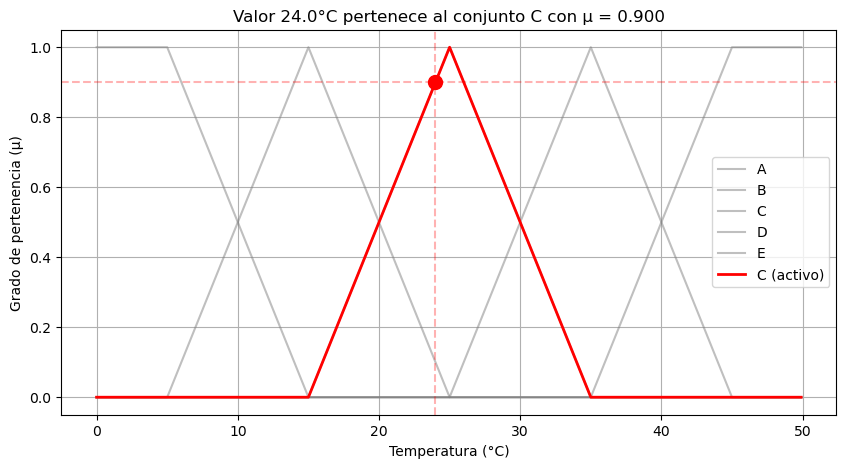

In [5]:
# punto 1.c
def identificar_conjunto_visual(x0, x_temp, A, B, C, D, E):
    """
    Identifica y visualiza el conjunto al que pertenece un valor x0
    """
    # Calcular pertenencias
    pertenencias = {
        'A': fuzz.interp_membership(x_temp, A, x0),
        'B': fuzz.interp_membership(x_temp, B, x0),
        'C': fuzz.interp_membership(x_temp, C, x0),
        'D': fuzz.interp_membership(x_temp, D, x0),
        'E': fuzz.interp_membership(x_temp, E, x0)
    }
    
    # Encontrar conjunto con mayor pertenencia
    conjunto_max = max(pertenencias.items(), key=lambda x: x[1])
    
    plt.figure(figsize=(10, 5))
    
    # Plotear todos los conjuntos con transparencia
    plt.plot(x_temp, A, 'gray', alpha=0.5, label='A')
    plt.plot(x_temp, B, 'gray', alpha=0.5, label='B')
    plt.plot(x_temp, C, 'gray', alpha=0.5, label='C')
    plt.plot(x_temp, D, 'gray', alpha=0.5, label='D')
    plt.plot(x_temp, E, 'gray', alpha=0.5, label='E')
    
    # Resaltar el conjunto con mayor pertenencia
    if conjunto_max[0] == 'A':
        plt.plot(x_temp, A, 'r', linewidth=2, label='A (activo)')
    elif conjunto_max[0] == 'B':
        plt.plot(x_temp, B, 'r', linewidth=2, label='B (activo)')
    elif conjunto_max[0] == 'C':
        plt.plot(x_temp, C, 'r', linewidth=2, label='C (activo)')
    elif conjunto_max[0] == 'D':
        plt.plot(x_temp, D, 'r', linewidth=2, label='D (activo)')
    else:
        plt.plot(x_temp, E, 'r', linewidth=2, label='E (activo)')
    
    # Marcar el punto x0
    plt.plot(x0, pertenencias[conjunto_max[0]], 'ro', markersize=10)
    
    # Líneas de referencia
    plt.axvline(x=x0, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=pertenencias[conjunto_max[0]], color='r', linestyle='--', alpha=0.3)
    
    # Configuración del gráfico
    plt.title(f'Valor {x0}°C pertenece al conjunto {conjunto_max[0]} con μ = {conjunto_max[1]:.3f}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.05, 1.05)
    plt.show()
    
    return conjunto_max

# Ejemplo de uso
x0 = 24.0
conjunto, valor = identificar_conjunto_visual(x0, x_temp, A, B, C, D, E)


In [6]:
# punto 1.d 
# Queremos evaluar x0 = 27 °C
x0 = 39.0
# interp_membership  corresponmde a μ(x)
mu_A   = fuzz.interp_membership(x_temp, A,  x0)
mu_B   = fuzz.interp_membership(x_temp, B,  x0)
mu_C   = fuzz.interp_membership(x_temp, C,  x0)
mu_D   = fuzz.interp_membership(x_temp, D,  x0)
mu_E   = fuzz.interp_membership(x_temp, E,  x0)

print(f"Pertenencia a 'A'   en {x0}°C: {mu_A:.3f}")
print(f"Pertenencia a 'B'   en {x0}°C: {mu_B:.3f}")
print(f"Pertenencia a 'C'   en {x0}°C: {mu_C:.3f}")
print(f"Pertenencia a 'D'   en {x0}°C: {mu_D:.3f}")
print(f"Pertenencia a 'E'   en {x0}°C: {mu_E:.3f}")

Pertenencia a 'A'   en 39.0°C: 0.000
Pertenencia a 'B'   en 39.0°C: 0.000
Pertenencia a 'C'   en 39.0°C: 0.000
Pertenencia a 'D'   en 39.0°C: 0.600
Pertenencia a 'E'   en 39.0°C: 0.400


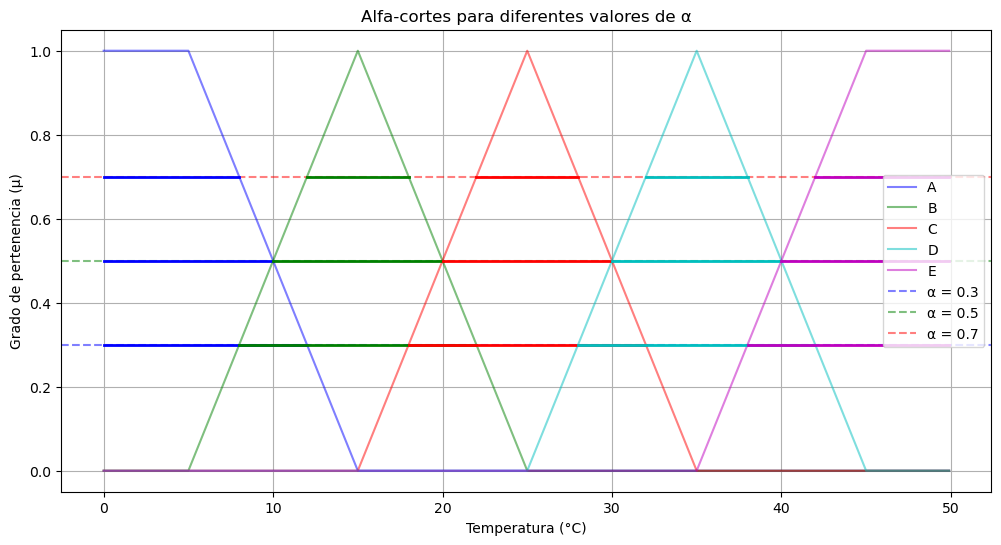


Para α = 0.3:
Conjunto A: [0.0, 12.0]°C
Conjunto B: [8.0, 22.0]°C
Conjunto C: [18.0, 32.0]°C
Conjunto D: [28.0, 42.0]°C
Conjunto E: [38.0, 49.9]°C

Para α = 0.5:
Conjunto A: [0.0, 10.0]°C
Conjunto B: [10.0, 20.0]°C
Conjunto C: [20.0, 30.0]°C
Conjunto D: [30.0, 40.0]°C
Conjunto E: [40.0, 49.9]°C

Para α = 0.7:
Conjunto A: [0.0, 8.0]°C
Conjunto B: [12.0, 18.0]°C
Conjunto C: [22.0, 28.0]°C
Conjunto D: [32.0, 38.0]°C
Conjunto E: [42.0, 49.9]°C


In [7]:
#punto 1.e 
def visualizar_alfa_cortes(x_temp, A, B, C, D, E, alfas=[0.3, 0.5, 0.7]):
    """
    Visualiza los alfa-cortes para los conjuntos difusos
    """
    plt.figure(figsize=(12, 6))
    
    # Plotear los conjuntos originales
    plt.plot(x_temp, A, 'b', label='A', alpha=0.5)
    plt.plot(x_temp, B, 'g', label='B', alpha=0.5)
    plt.plot(x_temp, C, 'r', label='C', alpha=0.5)
    plt.plot(x_temp, D, 'c', label='D', alpha=0.5)
    plt.plot(x_temp, E, 'm', label='E', alpha=0.5)
    
    # Colores para los alfa-cortes
    colores = ['blue', 'green', 'red']
    
    # Dibujar los alfa-cortes
    for i, alfa in enumerate(alfas):
        # Línea horizontal para el alfa-corte
        plt.axhline(y=alfa, color=colores[i], linestyle='--', 
                   alpha=0.5, label=f'α = {alfa}')
        
        # Encontrar los puntos de intersección
        A_cut = x_temp[A >= alfa]
        B_cut = x_temp[B >= alfa]
        C_cut = x_temp[C >= alfa]
        D_cut = x_temp[D >= alfa]
        E_cut = x_temp[E >= alfa]
        
        # Marcar las regiones de los alfa-cortes
        if len(A_cut) > 0:
            plt.plot([A_cut[0], A_cut[-1]], [alfa, alfa], 'b', linewidth=2)
        if len(B_cut) > 0:
            plt.plot([B_cut[0], B_cut[-1]], [alfa, alfa], 'g', linewidth=2)
        if len(C_cut) > 0:
            plt.plot([C_cut[0], C_cut[-1]], [alfa, alfa], 'r', linewidth=2)
        if len(D_cut) > 0:
            plt.plot([D_cut[0], D_cut[-1]], [alfa, alfa], 'c', linewidth=2)
        if len(E_cut) > 0:
            plt.plot([E_cut[0], E_cut[-1]], [alfa, alfa], 'm', linewidth=2)
    
    plt.title('Alfa-cortes para diferentes valores de α')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.05, 1.05)
    plt.show()

    # Imprimir información sobre los alfa-cortes
    for alfa in alfas:
        print(f"\nPara α = {alfa}:")
        for conjunto, nombre in zip([A, B, C, D, E], ['A', 'B', 'C', 'D', 'E']):
            corte = x_temp[conjunto >= alfa]
            if len(corte) > 0:
                print(f"Conjunto {nombre}: [{corte[0]:.1f}, {corte[-1]:.1f}]°C")
            else:
                print(f"Conjunto {nombre}: Vacío")

# Ejecutar la visualización
visualizar_alfa_cortes(x_temp, A, B, C, D, E, alfas=[0.3, 0.5, 0.7])

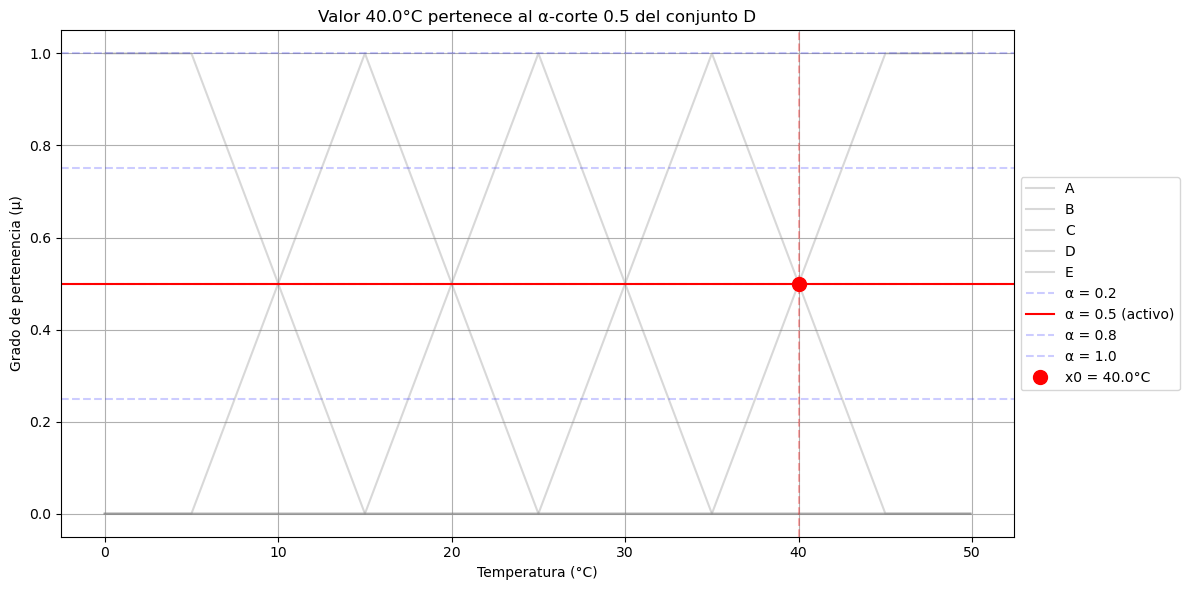

El valor 40.0°C pertenece al:
- α-corte: 0.5
- Conjunto: D
- Con pertenencia: 0.500


In [8]:
def identificar_alfa_corte(x0, x_temp, A, B, C, D, E, alfas=[0.25, 0.50,0.75,1.0]):
    """
    Identifica y visualiza el alfa-corte al que pertenece un valor x0
    
    Args:
        x0: Valor a evaluar
        x_temp: Universo de discurso
        A,B,C,D,E: Conjuntos difusos
        alfas: Lista de valores alfa para los cortes
    """
    # Calcular pertenencias del valor x0 a cada conjunto
    pertenencias = {
        'A': fuzz.interp_membership(x_temp, A, x0),
        'B': fuzz.interp_membership(x_temp, B, x0),
        'C': fuzz.interp_membership(x_temp, C, x0),
        'D': fuzz.interp_membership(x_temp, D, x0),
        'E': fuzz.interp_membership(x_temp, E, x0)
    }
    
    # Encontrar la máxima pertenencia
    max_pertenencia = max(pertenencias.values())
    conjunto_max = max(pertenencias.items(), key=lambda x: x[1])[0]
    
    # Encontrar el alfa-corte más cercano
    alfa_corte = min([a for a in alfas if a <= max_pertenencia], key=lambda x: abs(x - max_pertenencia))
    
    # Visualización
    plt.figure(figsize=(12, 6))
    
    # Plotear los conjuntos originales con transparencia
    plt.plot(x_temp, A, 'gray', alpha=0.3, label='A')
    plt.plot(x_temp, B, 'gray', alpha=0.3, label='B')
    plt.plot(x_temp, C, 'gray', alpha=0.3, label='C')
    plt.plot(x_temp, D, 'gray', alpha=0.3, label='D')
    plt.plot(x_temp, E, 'gray', alpha=0.3, label='E')
    
    # Dibujar los alfa-cortes
    for alfa in alfas:
        color = 'red' if alfa == alfa_corte else 'blue'
        alpha = 1.0 if alfa == alfa_corte else 0.2
        linestyle = '-' if alfa == alfa_corte else '--'
        label = f'α = {alfa:.1f}' + (' (activo)' if alfa == alfa_corte else '')
        
        plt.axhline(y=alfa, color=color, linestyle=linestyle, 
                   alpha=alpha, label=label)
    
    # Resaltar el punto x0
    plt.plot(x0, max_pertenencia, 'ro', markersize=10, label=f'x0 = {x0}°C')
    
    # Líneas de referencia
    plt.axvline(x=x0, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=max_pertenencia, color='r', linestyle='--', alpha=0.3)
    
    # Configuración del gráfico
    plt.title(f'Valor {x0}°C pertenece al α-corte {alfa_corte:.1f} del conjunto {conjunto_max}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()
    
    return alfa_corte, conjunto_max, max_pertenencia

# Ejemplo de uso
x0 = 40.0
alfa, conjunto, pertenencia = identificar_alfa_corte(x0, x_temp, A, B, C, D, E)
print(f"El valor {x0}°C pertenece al:")
print(f"- α-corte: {alfa:.1f}")
print(f"- Conjunto: {conjunto}")
print(f"- Con pertenencia: {pertenencia:.3f}")


### Operaciones difusas 

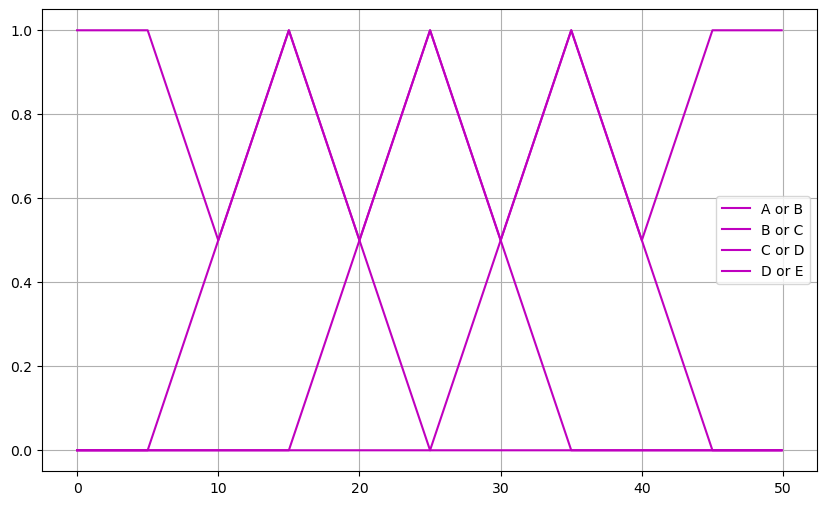

In [9]:
# punto 2.b
# Universo


# Operaciones
NOT_A = 1 - A                  # negación
#A_AND_B = np.fmin(A, B)        # conjunción (mínimo)

A_OR_B = np.fmax(A, B)         # disyunción (máximo)
B_OR_C = np.fmax(B, C)         
C_OR_D = np.fmax(C, D)         
D_OR_E = np.fmax(D, E)         


# Visualización
plt.figure(figsize=(10, 6))
#plt.plot(x, A, 'b', label='A')
#plt.plot(x, B, 'g', label='B')
#plt.plot(x, NOT_A, 'r--', label='NOT A')
plt.plot(x_temp, A_OR_B, 'm', label='A or B')
plt.plot(x_temp, B_OR_C, 'm', label='B or C')
plt.plot(x_temp, C_OR_D, 'm', label='C or D')
plt.plot(x_temp, D_OR_E, 'm', label='D or E')
#plt.plot(x, A_OR_B, 'c', label='A OR B')
plt.legend(); plt.grid(); plt.show()

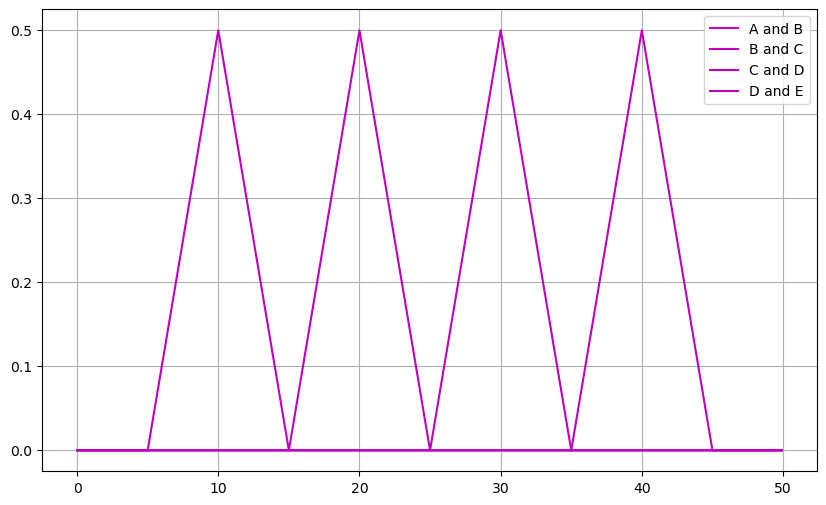

In [10]:
# punto 2.c
# Universo


# Operaciones
NOT_A = 1 - A                  # negación
#A_AND_B = np.fmin(A, B)        # conjunción (mínimo)

A_AND_B = np.fmin(A, B)         # disyunción (máximo)
B_AND_C = np.fmin(B, C)         
C_AND_D = np.fmin(C, D)         
D_AND_E = np.fmin(D, E)         


# Visualización
plt.figure(figsize=(10, 6))
#plt.plot(x, A, 'b', label='A')
#plt.plot(x, B, 'g', label='B')
#plt.plot(x, NOT_A, 'r--', label='NOT A')
plt.plot(x_temp, A_AND_B, 'm', label='A and B')
plt.plot(x_temp, B_AND_C, 'm', label='B and C')
plt.plot(x_temp, C_AND_D, 'm', label='C and D')
plt.plot(x_temp, D_AND_E, 'm', label='D and E')
#plt.plot(x, A_OR_B, 'c', label='A OR B')
plt.legend(); plt.grid(); plt.show()

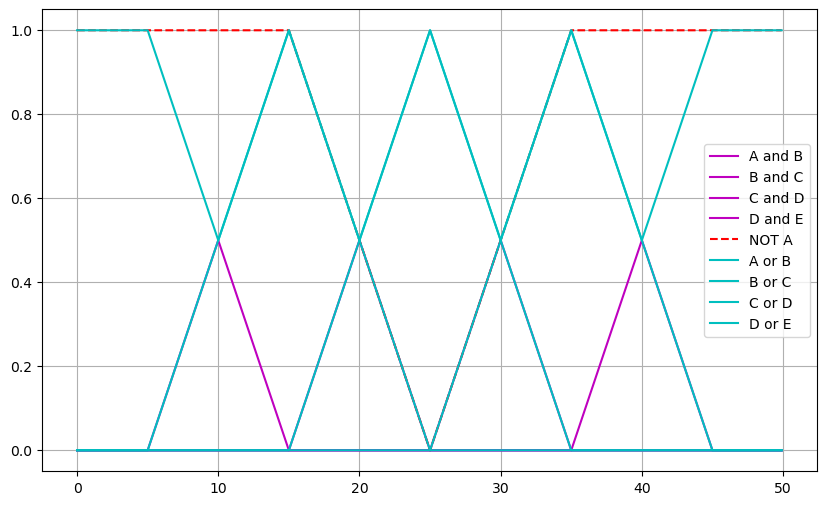

In [11]:
# punto 2.d
# Universo

# Operaciones
NOT_C = 1 - C                  # negación / complemento

A_OR_B = np.fmax(A, B)
B_OR_C = np.fmax(B, C)         
C_OR_D = np.fmax(C, D)         
D_OR_E = np.fmax(D, E)         

A_AND_B = np.fmin(A, B)
B_AND_C = np.fmin(B, C)         
C_AND_D = np.fmin(C, D)         
D_AND_E = np.fmin(D, E)         


# Visualización
plt.figure(figsize=(10, 6))
#plt.plot(x, A, 'b', label='A')
#plt.plot(x, B, 'g', label='B')
#plt.plot(x, NOT_A, 'r--', label='NOT A')
plt.plot(x_temp, A_AND_B, 'm', label='A and B')
plt.plot(x_temp, B_AND_C, 'm', label='B and C')
plt.plot(x_temp, C_AND_D, 'm', label='C and D')
plt.plot(x_temp, D_AND_E, 'm', label='D and E')
plt.plot(x_temp, NOT_C, 'r--', label='NOT A')
plt.plot(x_temp, A_OR_B, 'c', label='A or B')
plt.plot(x_temp, B_OR_C, 'c', label='B or C')
plt.plot(x_temp, C_OR_D, 'c', label='C or D')
plt.plot(x_temp, D_OR_E, 'c', label='D or E')

#plt.plot(x, A_OR_B, 'c', label='A OR B')
plt.legend(); plt.grid(); plt.show()

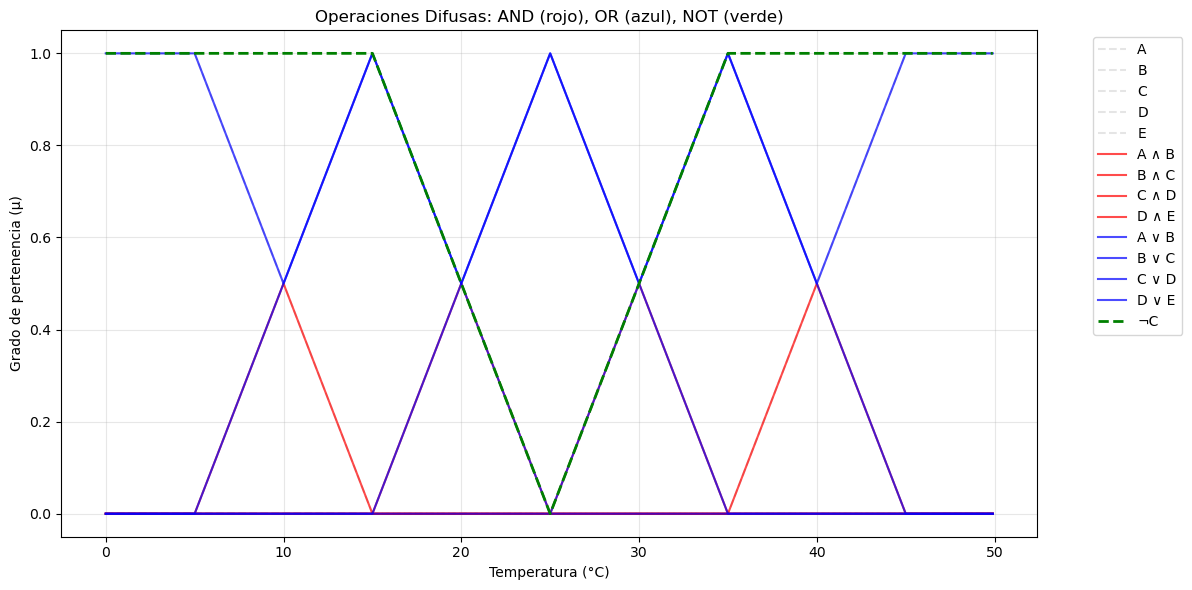

In [12]:
def visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E):
    """
    Visualiza todas las operaciones difusas (AND, OR, NOT) en un solo gráfico
    """
    # Calcular operaciones
    NOT_C = 1 - C  # Complemento
    
    # Operaciones OR (máximo)
    A_OR_B = np.fmax(A, B)
    B_OR_C = np.fmax(B, C)         
    C_OR_D = np.fmax(C, D)         
    D_OR_E = np.fmax(D, E)         
    
    # Operaciones AND (mínimo)
    A_AND_B = np.fmin(A, B)
    B_AND_C = np.fmin(B, C)         
    C_AND_D = np.fmin(C, D)         
    D_AND_E = np.fmin(D, E)         

    # Crear figura
    plt.figure(figsize=(12, 6))
    
    # Graficar conjuntos originales con transparencia
    plt.plot(x_temp, A, 'gray', alpha=0.2, linestyle='--', label='A')
    plt.plot(x_temp, B, 'gray', alpha=0.2, linestyle='--', label='B')
    plt.plot(x_temp, C, 'gray', alpha=0.2, linestyle='--', label='C')
    plt.plot(x_temp, D, 'gray', alpha=0.2, linestyle='--', label='D')
    plt.plot(x_temp, E, 'gray', alpha=0.2, linestyle='--', label='E')
    
    # Graficar operaciones AND en rojo
    plt.plot(x_temp, A_AND_B, 'r-', label='A ∧ B', alpha=0.7)
    plt.plot(x_temp, B_AND_C, 'r-', label='B ∧ C', alpha=0.7)
    plt.plot(x_temp, C_AND_D, 'r-', label='C ∧ D', alpha=0.7)
    plt.plot(x_temp, D_AND_E, 'r-', label='D ∧ E', alpha=0.7)
    
    # Graficar operaciones OR en azul
    plt.plot(x_temp, A_OR_B, 'b-', label='A ∨ B', alpha=0.7)
    plt.plot(x_temp, B_OR_C, 'b-', label='B ∨ C', alpha=0.7)
    plt.plot(x_temp, C_OR_D, 'b-', label='C ∨ D', alpha=0.7)
    plt.plot(x_temp, D_OR_E, 'b-', label='D ∨ E', alpha=0.7)
    
    # Graficar NOT en verde
    plt.plot(x_temp, NOT_C, 'g--', label='¬C', linewidth=2)
    
    # Configuración del gráfico
    plt.title('Operaciones Difusas: AND (rojo), OR (azul), NOT (verde)')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E)

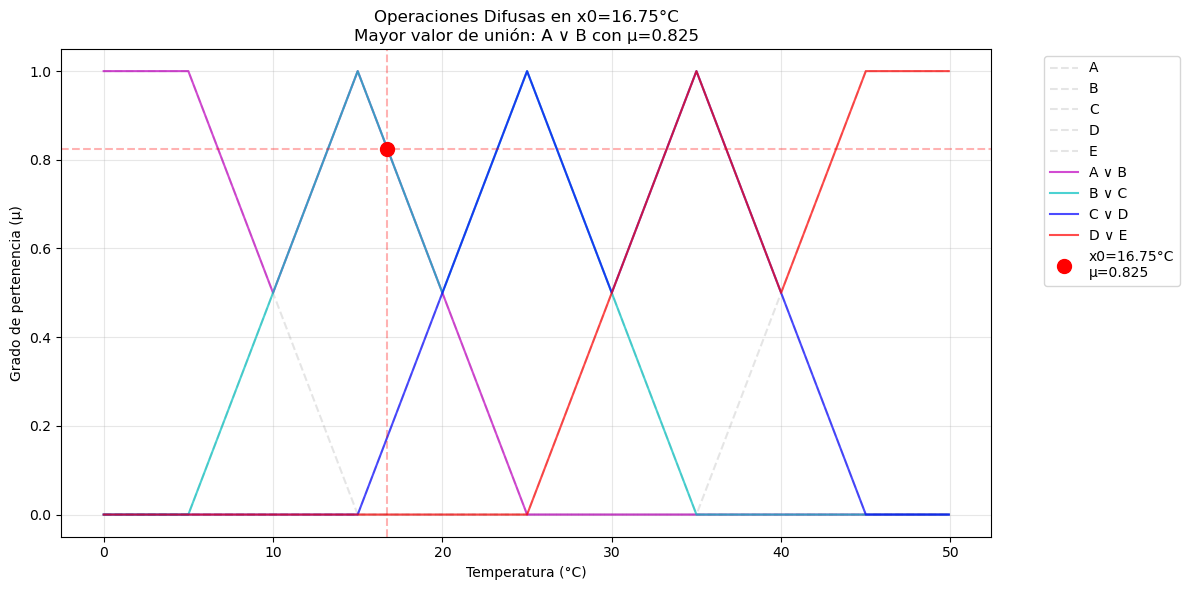


Valores de pertenencia en x0 = 16.75°C:
A ∨ B: μ = 0.825
B ∨ C: μ = 0.825
C ∨ D: μ = 0.175
D ∨ E: μ = 0.000


In [13]:
#punto 3 
def visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0=25.0):
    """
    Visualiza todas las operaciones difusas (AND, OR, NOT) en un solo gráfico
    y muestra el valor de pertenencia en un punto x0
    """
    # Calcular operaciones
    NOT_C = 1 - C  # Complemento
    
    # Operaciones OR (máximo)
    A_OR_B = np.fmax(A, B)
    B_OR_C = np.fmax(B, C)         
    C_OR_D = np.fmax(C, D)         
    D_OR_E = np.fmax(D, E)         
    
    # Operaciones AND (mínimo)
    A_AND_B = np.fmin(A, B)
    B_AND_C = np.fmin(B, C)         
    C_AND_D = np.fmin(C, D)         
    D_AND_E = np.fmin(D, E)         

    # Calcular pertenencias en x0
    or_values = {
        'A ∨ B': np.interp(x0, x_temp, A_OR_B),
        'B ∨ C': np.interp(x0, x_temp, B_OR_C),
        'C ∨ D': np.interp(x0, x_temp, C_OR_D),
        'D ∨ E': np.interp(x0, x_temp, D_OR_E)
    }
    
    # Encontrar la unión con mayor pertenencia
    max_union = max(or_values.items(), key=lambda x: x[1])

    # Crear figura
    plt.figure(figsize=(12, 6))
    
    # Graficar conjuntos originales con transparencia
    plt.plot(x_temp, A, 'gray', alpha=0.2, linestyle='--', label='A')
    plt.plot(x_temp, B, 'gray', alpha=0.2, linestyle='--', label='B')
    plt.plot(x_temp, C, 'gray', alpha=0.2, linestyle='--', label='C')
    plt.plot(x_temp, D, 'gray', alpha=0.2, linestyle='--', label='D')
    plt.plot(x_temp, E, 'gray', alpha=0.2, linestyle='--', label='E')
    
    # Graficar operaciones AND en rojo
    #plt.plot(x_temp, A_AND_B, 'r-', label='A ∧ B', alpha=0.4)
    #plt.plot(x_temp, B_AND_C, 'r-', label='B ∧ C', alpha=0.4)
    #plt.plot(x_temp, C_AND_D, 'r-', label='C ∧ D', alpha=0.4)
    #plt.plot(x_temp, D_AND_E, 'r-', label='D ∧ E', alpha=0.4)
    
    # Graficar operaciones OR en azul
    plt.plot(x_temp, A_OR_B, 'm-', label='A ∨ B', alpha=0.7)
    plt.plot(x_temp, B_OR_C, 'c-', label='B ∨ C', alpha=0.7)
    plt.plot(x_temp, C_OR_D, 'b-', label='C ∨ D', alpha=0.7)
    plt.plot(x_temp, D_OR_E, 'r-', label='D ∨ E', alpha=0.7)
    
    # Graficar NOT en verde
    #plt.plot(x_temp, NOT_C, 'g--', label='¬C', linewidth=2)
    
    # Marcar el punto x0 y sus valores
    plt.plot(x0, max_union[1], 'ro', markersize=10, 
            label=f'x0={x0}°C\nμ={max_union[1]:.3f}')
    
    # Líneas de referencia
    plt.axvline(x=x0, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=max_union[1], color='r', linestyle='--', alpha=0.3)
    
    # Configuración del gráfico
    plt.title(f'Operaciones Difusas en x0={x0}°C\n'
             f'Mayor valor de unión: {max_union[0]} con μ={max_union[1]:.3f}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()
    
    # Imprimir valores de pertenencia
    print(f"\nValores de pertenencia en x0 = {x0}°C:")
    for union, valor in or_values.items():
        print(f"{union}: μ = {valor:.3f}")

# Ejemplo de uso
x0 = 16.75  # Punto a evaluar
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0)

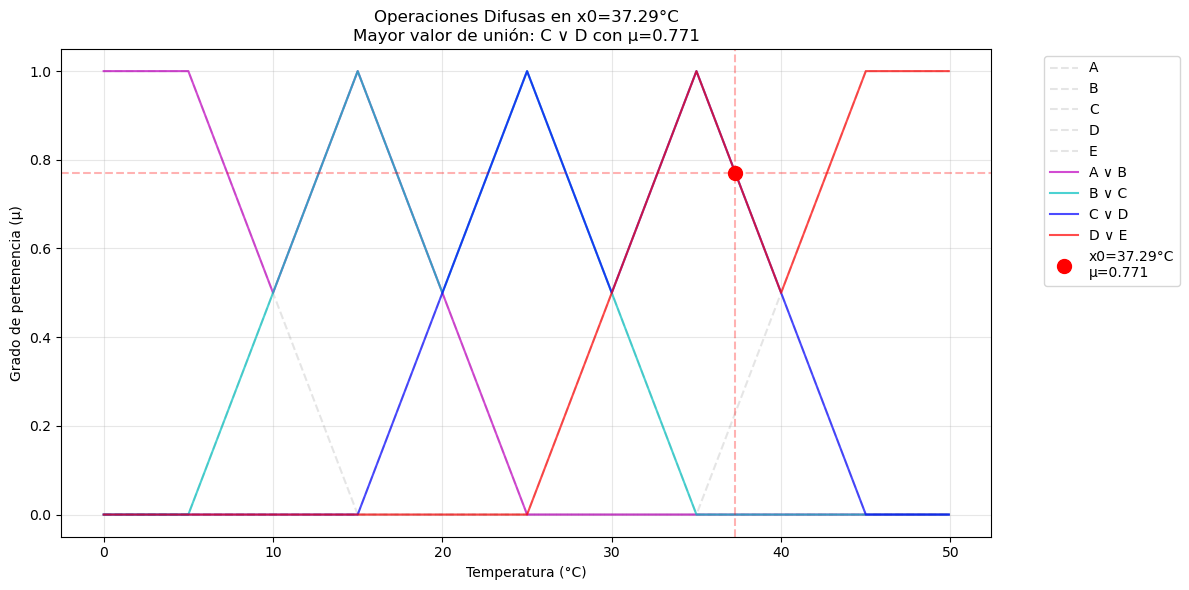


Valores de pertenencia en x0 = 37.29°C:
A ∨ B: μ = 0.000
B ∨ C: μ = 0.000
C ∨ D: μ = 0.771
D ∨ E: μ = 0.771


In [14]:
#punto 3 

# Ejemplo de uso
x0 = 37.29  # Punto a evaluar
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0)

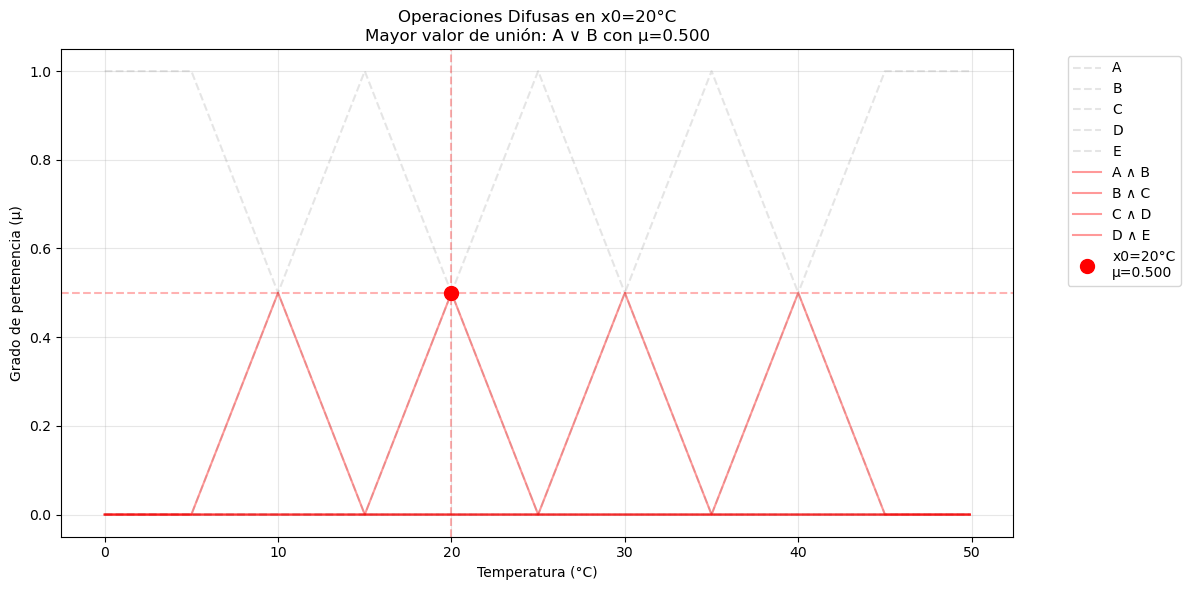


Valores de pertenencia en x0 = 20°C:
A ∨ B: μ = 0.500
B ∨ C: μ = 0.500
C ∨ D: μ = 0.500
D ∨ E: μ = 0.000


In [15]:
#punto 3 
def visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0=25.0):
    """
    Visualiza todas las operaciones difusas (AND, OR, NOT) en un solo gráfico
    y muestra el valor de pertenencia en un punto x0
    """
    # Calcular operaciones
    NOT_C = 1 - C  # Complemento
    
    # Operaciones OR (máximo)
    A_OR_B = np.fmax(A, B)
    B_OR_C = np.fmax(B, C)         
    C_OR_D = np.fmax(C, D)         
    D_OR_E = np.fmax(D, E)         
    
    # Operaciones AND (mínimo)
    A_AND_B = np.fmin(A, B)
    B_AND_C = np.fmin(B, C)         
    C_AND_D = np.fmin(C, D)         
    D_AND_E = np.fmin(D, E)         

    # Calcular pertenencias en x0
    or_values = {
        'A ∨ B': np.interp(x0, x_temp, A_OR_B),
        'B ∨ C': np.interp(x0, x_temp, B_OR_C),
        'C ∨ D': np.interp(x0, x_temp, C_OR_D),
        'D ∨ E': np.interp(x0, x_temp, D_OR_E)
    }
    
    # Encontrar la unión con mayor pertenencia
    max_union = max(or_values.items(), key=lambda x: x[1])

    # Crear figura
    plt.figure(figsize=(12, 6))
    
    # Graficar conjuntos originales con transparencia
    plt.plot(x_temp, A, 'gray', alpha=0.2, linestyle='--', label='A')
    plt.plot(x_temp, B, 'gray', alpha=0.2, linestyle='--', label='B')
    plt.plot(x_temp, C, 'gray', alpha=0.2, linestyle='--', label='C')
    plt.plot(x_temp, D, 'gray', alpha=0.2, linestyle='--', label='D')
    plt.plot(x_temp, E, 'gray', alpha=0.2, linestyle='--', label='E')
    
    # Graficar operaciones AND en rojo
    plt.plot(x_temp, A_AND_B, 'r-', label='A ∧ B', alpha=0.4)
    plt.plot(x_temp, B_AND_C, 'r-', label='B ∧ C', alpha=0.4)
    plt.plot(x_temp, C_AND_D, 'r-', label='C ∧ D', alpha=0.4)
    plt.plot(x_temp, D_AND_E, 'r-', label='D ∧ E', alpha=0.4)
    
    # Graficar operaciones OR en azul
    #plt.plot(x_temp, A_OR_B, 'm-', label='A ∨ B', alpha=0.7)
    #plt.plot(x_temp, B_OR_C, 'c-', label='B ∨ C', alpha=0.7)
    #plt.plot(x_temp, C_OR_D, 'b-', label='C ∨ D', alpha=0.7)
    #plt.plot(x_temp, D_OR_E, 'r-', label='D ∨ E', alpha=0.7)
    
    # Graficar NOT en verde
    #plt.plot(x_temp, NOT_C, 'g--', label='¬C', linewidth=2)
    
    # Marcar el punto x0 y sus valores
    plt.plot(x0, max_union[1], 'ro', markersize=10, 
            label=f'x0={x0}°C\nμ={max_union[1]:.3f}')
    
    # Líneas de referencia
    plt.axvline(x=x0, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=max_union[1], color='r', linestyle='--', alpha=0.3)
    
    # Configuración del gráfico
    plt.title(f'Operaciones Difusas en x0={x0}°C\n'
             f'Mayor valor de unión: {max_union[0]} con μ={max_union[1]:.3f}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()
    
    # Imprimir valores de pertenencia
    print(f"\nValores de pertenencia en x0 = {x0}°C:")
    for union, valor in or_values.items():
        print(f"{union}: μ = {valor:.3f}")

# Ejemplo de uso
x0 = 20  # Punto a evaluar
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0)

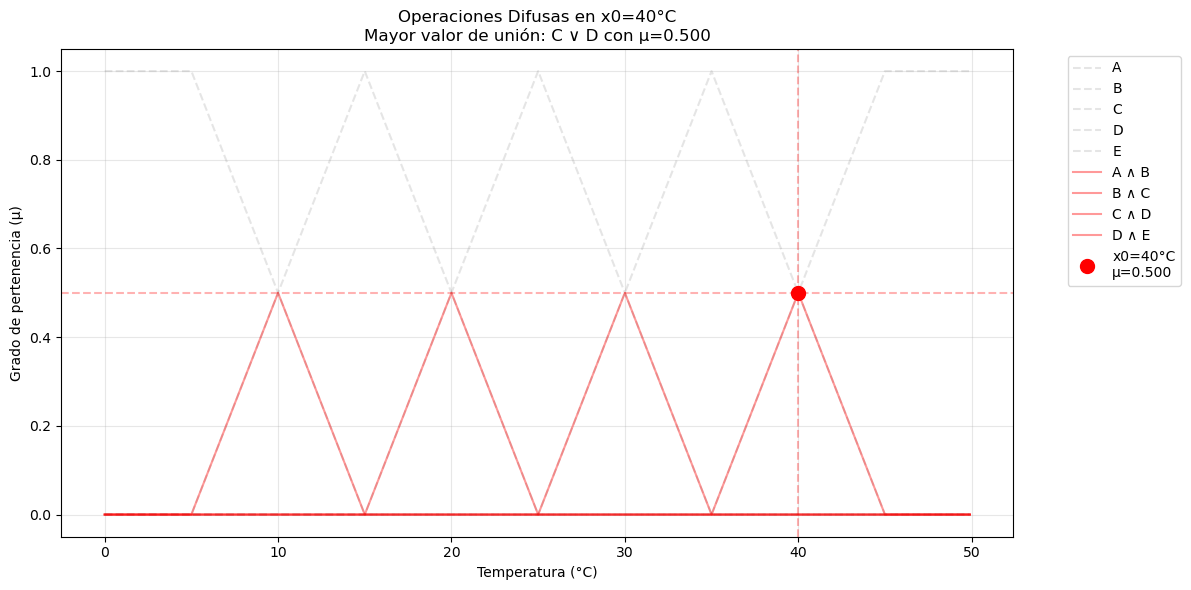


Valores de pertenencia en x0 = 40°C:
A ∨ B: μ = 0.000
B ∨ C: μ = 0.000
C ∨ D: μ = 0.500
D ∨ E: μ = 0.500


In [16]:
x0 = 40  # Punto a evaluar
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0)

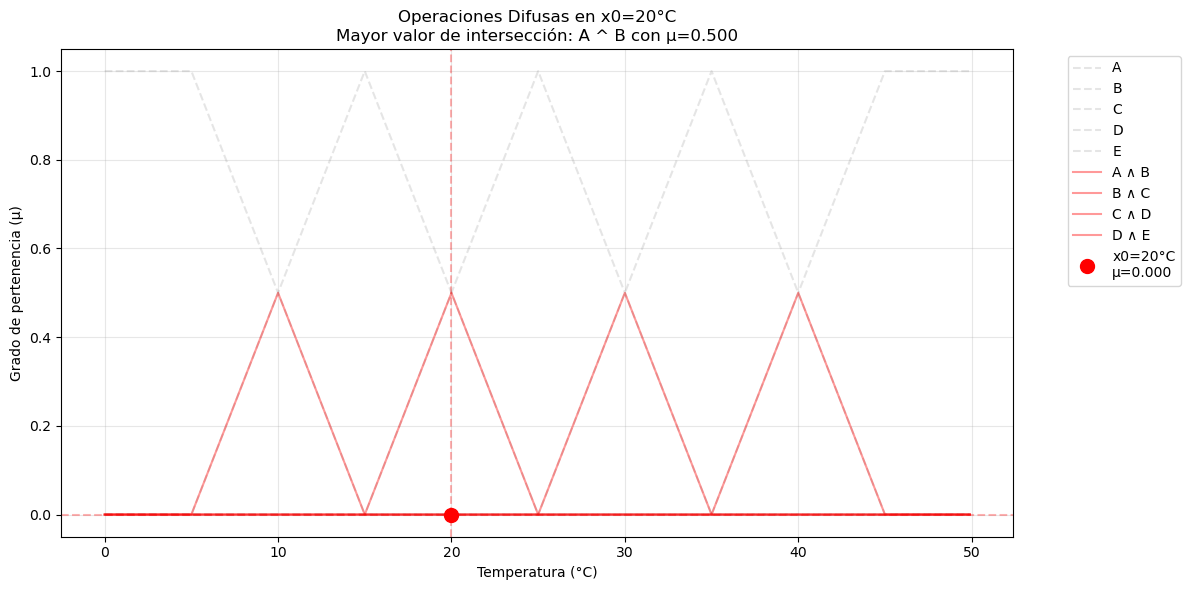


Valores de pertenencia en x0 = 20°C:
A ^ B: μ = 0.000
B ^ C: μ = 0.500
C ^ D: μ = 0.000
D ^ E: μ = 0.000


In [17]:
#punto 3 
def visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0=25.0):
    """
    Visualiza todas las operaciones difusas (AND, OR, NOT) en un solo gráfico
    y muestra el valor de pertenencia en un punto x0
    """
    # Calcular operaciones
    NOT_C = 1 - C  # Complemento
    
    # Operaciones OR (máximo)
    A_OR_B = np.fmax(A, B)
    B_OR_C = np.fmax(B, C)         
    C_OR_D = np.fmax(C, D)         
    D_OR_E = np.fmax(D, E)         
    
    # Operaciones AND (mínimo)
    A_AND_B = np.fmin(A, B)
    B_AND_C = np.fmin(B, C)         
    C_AND_D = np.fmin(C, D)         
    D_AND_E = np.fmin(D, E)         

    # Calcular pertenencias en x0
    or_values = {
        'A ∨ B': np.interp(x0, x_temp, A_OR_B),
        'B ∨ C': np.interp(x0, x_temp, B_OR_C),
        'C ∨ D': np.interp(x0, x_temp, C_OR_D),
        'D ∨ E': np.interp(x0, x_temp, D_OR_E)
    }

    and_values = {
        'A ^ B': np.interp(x0, x_temp, A_AND_B),
        'B ^ C': np.interp(x0, x_temp, B_AND_C),
        'C ^ D': np.interp(x0, x_temp, C_AND_D),
        'D ^ E': np.interp(x0, x_temp, D_AND_E)
    }    
    # Encontrar la unión con mayor pertenencia
    max_union = max(or_values.items(), key=lambda x: x[1])

    # Encontrar la interseccion con mayor pertenencia
    min_union = min(and_values.items(), key=lambda x: x[1])    
    # Crear figura
    plt.figure(figsize=(12, 6))
    
    # Graficar conjuntos originales con transparencia
    plt.plot(x_temp, A, 'gray', alpha=0.2, linestyle='--', label='A')
    plt.plot(x_temp, B, 'gray', alpha=0.2, linestyle='--', label='B')
    plt.plot(x_temp, C, 'gray', alpha=0.2, linestyle='--', label='C')
    plt.plot(x_temp, D, 'gray', alpha=0.2, linestyle='--', label='D')
    plt.plot(x_temp, E, 'gray', alpha=0.2, linestyle='--', label='E')
    
    # Graficar operaciones AND en rojo
    plt.plot(x_temp, A_AND_B, 'r-', label='A ∧ B', alpha=0.4)
    plt.plot(x_temp, B_AND_C, 'r-', label='B ∧ C', alpha=0.4)
    plt.plot(x_temp, C_AND_D, 'r-', label='C ∧ D', alpha=0.4)
    plt.plot(x_temp, D_AND_E, 'r-', label='D ∧ E', alpha=0.4)
    
    # Graficar operaciones OR en azul
    #plt.plot(x_temp, A_OR_B, 'm-', label='A ∨ B', alpha=0.7)
    #plt.plot(x_temp, B_OR_C, 'c-', label='B ∨ C', alpha=0.7)
    #plt.plot(x_temp, C_OR_D, 'b-', label='C ∨ D', alpha=0.7)
    #plt.plot(x_temp, D_OR_E, 'r-', label='D ∨ E', alpha=0.7)
    
    # Graficar NOT en verde
    #plt.plot(x_temp, NOT_C, 'g--', label='¬C', linewidth=2)
    
    # Marcar el punto x0 y sus valores
    plt.plot(x0, min_union[1], 'ro', markersize=10, 
            label=f'x0={x0}°C\nμ={min_union[1]:.3f}')
    
    # Líneas de referencia
    plt.axvline(x=x0, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=min_union[1], color='r', linestyle='--', alpha=0.3)
    
    # Configuración del gráfico
    plt.title(f'Operaciones Difusas en x0={x0}°C\n'
             f'Mayor valor de intersección: {min_union[0]} con μ={max_union[1]:.3f}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()
    
    # Imprimir valores de pertenencia
    print(f"\nValores de pertenencia en x0 = {x0}°C:")
    for inter, valor in and_values.items():
        print(f"{inter}: μ = {valor:.3f}")

# Ejemplo de uso
x0 = 20  # Punto a evaluar
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0)

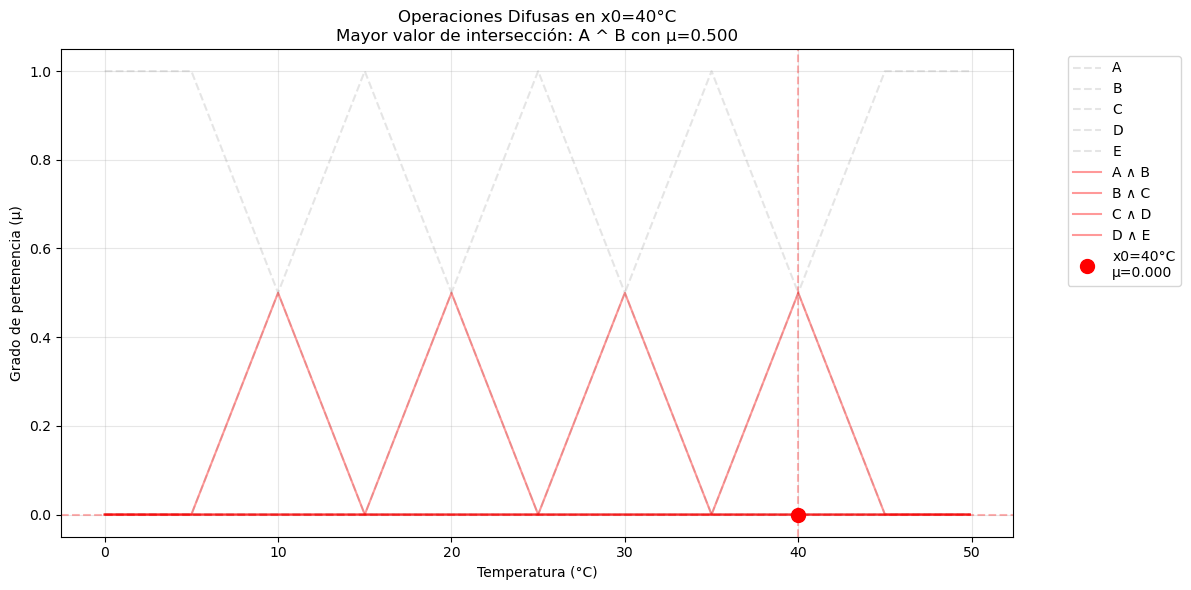


Valores de pertenencia en x0 = 40°C:
A ^ B: μ = 0.000
B ^ C: μ = 0.000
C ^ D: μ = 0.000
D ^ E: μ = 0.500


In [18]:
#punto 3 


# Ejemplo de uso
x0 = 40  # Punto a evaluar
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0)


Valores de pertenencia en x0 = 16.75°C:
A ∨ B: μ = 0.825
B ∨ C: μ = 0.825
C ∨ D: μ = 0.175
D ∨ E: μ = 0.000

Valores de pertenencia en x0 = 37.29°C:
A ∨ B: μ = 0.000
B ∨ C: μ = 0.000
C ∨ D: μ = 0.771
D ∨ E: μ = 0.771

Valores de pertenencia en x0 = 20°C:
A ∨ B: μ = 0.500
B ∨ C: μ = 0.500
C ∨ D: μ = 0.500
D ∨ E: μ = 0.000

Valores de pertenencia en x0 = 40°C:
A ∨ B: μ = 0.000
B ∨ C: μ = 0.000
C ∨ D: μ = 0.500
D ∨ E: μ = 0.500


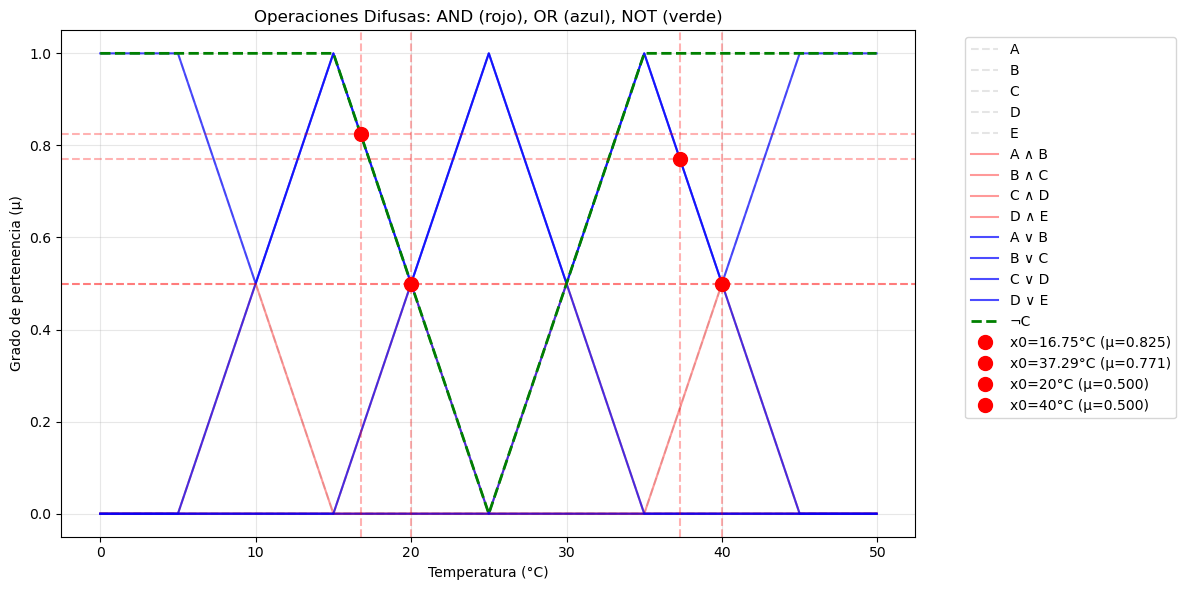

In [61]:
# 3 todos los graficos 
def visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, x0_list=[25.0]):
    """
    Visualiza todas las operaciones difusas (AND, OR, NOT) en un solo gráfico
    y muestra múltiples puntos de evaluación
    
    Args:
        x_temp: Universo de discurso
        A,B,C,D,E: Conjuntos difusos
        x0_list: Lista de puntos a evaluar
    """
    # Calcular operaciones
    NOT_C = 1 - C  # Complemento
    
    # Operaciones OR (máximo)
    A_OR_B = np.fmax(A, B)
    B_OR_C = np.fmax(B, C)         
    C_OR_D = np.fmax(C, D)         
    D_OR_E = np.fmax(D, E)         
    
    # Operaciones AND (mínimo)
    A_AND_B = np.fmin(A, B)
    B_AND_C = np.fmin(B, C)         
    C_AND_D = np.fmin(C, D)         
    D_AND_E = np.fmin(D, E)         

    # Crear figura
    plt.figure(figsize=(12, 6))
    
    # Graficar conjuntos originales con transparencia
    plt.plot(x_temp, A, 'gray', alpha=0.2, linestyle='--', label='A')
    plt.plot(x_temp, B, 'gray', alpha=0.2, linestyle='--', label='B')
    plt.plot(x_temp, C, 'gray', alpha=0.2, linestyle='--', label='C')
    plt.plot(x_temp, D, 'gray', alpha=0.2, linestyle='--', label='D')
    plt.plot(x_temp, E, 'gray', alpha=0.2, linestyle='--', label='E')
    
    # Graficar operaciones AND en rojo
    plt.plot(x_temp, A_AND_B, 'r-', label='A ∧ B', alpha=0.4)
    plt.plot(x_temp, B_AND_C, 'r-', label='B ∧ C', alpha=0.4)
    plt.plot(x_temp, C_AND_D, 'r-', label='C ∧ D', alpha=0.4)
    plt.plot(x_temp, D_AND_E, 'r-', label='D ∧ E', alpha=0.4)
    
    # Graficar operaciones OR en azul
    plt.plot(x_temp, A_OR_B, 'b-', label='A ∨ B', alpha=0.7)
    plt.plot(x_temp, B_OR_C, 'b-', label='B ∨ C', alpha=0.7)
    plt.plot(x_temp, C_OR_D, 'b-', label='C ∨ D', alpha=0.7)
    plt.plot(x_temp, D_OR_E, 'b-', label='D ∨ E', alpha=0.7)
    
    # Graficar NOT en verde
    plt.plot(x_temp, NOT_C, 'g--', label='¬C', linewidth=2)
    
    # Evaluar y marcar cada punto
    for x0 in x0_list:
        # Calcular pertenencias en x0
        or_values = {
            'A ∨ B': np.interp(x0, x_temp, A_OR_B),
            'B ∨ C': np.interp(x0, x_temp, B_OR_C),
            'C ∨ D': np.interp(x0, x_temp, C_OR_D),
            'D ∨ E': np.interp(x0, x_temp, D_OR_E)
        }
        
        # Encontrar la unión con mayor pertenencia
        max_union = max(or_values.items(), key=lambda x: x[1])
        
        # Marcar el punto x0 y sus valores
        plt.plot(x0, max_union[1], 'ro', markersize=10, 
                label=f'x0={x0}°C (μ={max_union[1]:.3f})')
        
        # Líneas de referencia
        plt.axvline(x=x0, color='r', linestyle='--', alpha=0.3)
        plt.axhline(y=max_union[1], color='r', linestyle='--', alpha=0.3)
        
        # Imprimir valores de pertenencia
        print(f"\nValores de pertenencia en x0 = {x0}°C:")
        for union, valor in or_values.items():
            print(f"{union}: μ = {valor:.3f}")
    
    # Configuración del gráfico
    plt.title('Operaciones Difusas: AND (rojo), OR (azul), NOT (verde)')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Grado de pertenencia (μ)')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso con múltiples puntos
puntos_a_evaluar = [16.75, 37.29, 20, 40]  # Lista de puntos a evaluar
x_temp = np.arange(0, 50, 0.05)  # 0 a 50 °C
visualizar_operaciones_difusas_combinadas(x_temp, A, B, C, D, E, puntos_a_evaluar)

In [ ]:
#punto 4
#para 16.75 los conjuntos activos son c y d
#para 37.29 los conjuntos activos son c y d y d y e
#para interseccion
#para 20 los conjuntos activos son b y c 
#para 40 los conjuntos activos son d y e 

# Intersección y unión clásicas
# Operaciones OR (máximo)
A_OR_B = np.fmax(A, B)
B_OR_C = np.fmax(B, C)         
C_OR_D = np.fmax(C, D)         
D_OR_E = np.fmax(D, E)         
    
# Operaciones AND (mínimo)
A_AND_B = np.fmin(A, B)
B_AND_C = np.fmin(B, C)         
C_AND_D = np.fmin(C, D)         
D_AND_E = np.fmin(D, E)       

# Producto algebraico e Suma algebraica
B_and_C_prod = B * C
D_and_E_prod = D * E

C_or_D_sum   = C + D - (C * D)
D_or_E_sum   = D + E - (D * E)

# Visualización
plt.figure(figsize=(10,6))
#plt.plot(x, A, 'b', label='A')
#plt.plot(x, B, 'g', label='B')
plt.plot(x_temp, A_AND_B, 'r--', label='A ∩ B (min)')
plt.plot(x_temp, B_AND_C, 'm--', label='B ∩ C (min)')
plt.plot(x_temp, D_and_E_prod, 'r', label='A ∩ B (producto)')
plt.plot(x_temp, B_and_C_prod, 'm', label='B ∩ C (producto)')

plt.plot(x_temp, C_OR_D, 'y--', label='C ∪ D (max)')
plt.plot(x_temp, D_OR_E, 'g--', label='D ∪ E (max)')
plt.plot(x_temp, C_or_D_sum, 'y', label='C ∪ D (suma algebraica)')
plt.plot(x_temp, D_or_E_sum, 'g', label='D ∪ E (suma algebraica)')

plt.title("Operadores difusos clásicos vs algebraicos")
plt.ylim(-0.05, 1.05); plt.legend(); plt.grid(True)
plt.show()

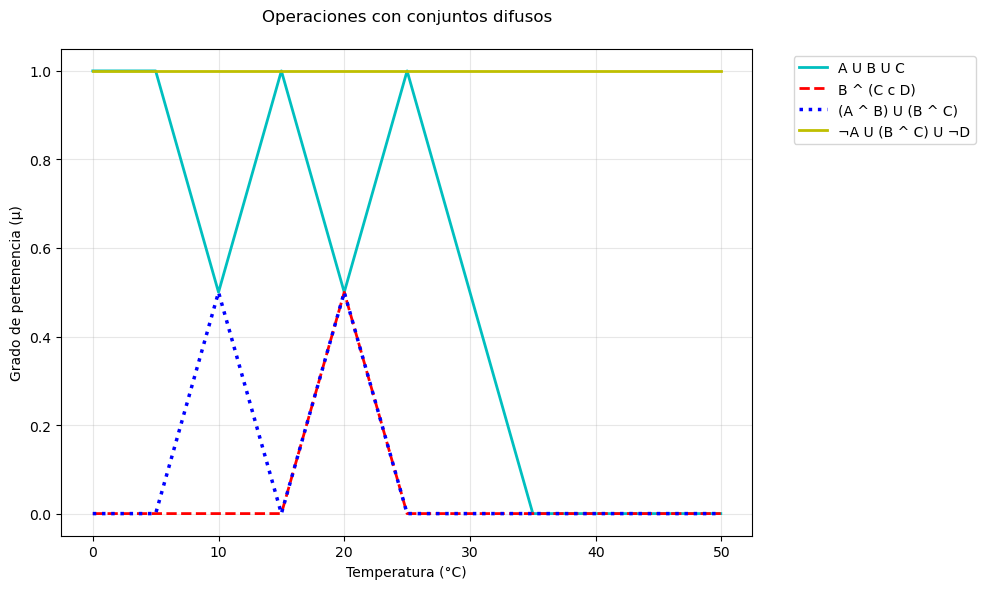

In [36]:
#punto 5.a 
# Intersección y unión clásicas
x_temp = np.arange(0, 50, 0.05)  # 1000 puntos 
AND_ABC = np.minimum.reduce([A, B, C])
OR_ABC  = np.maximum.reduce([A, B, C])


# Intersección y unión algebraicas
AND_ABC_prod = np.prod([A, B, C], axis=0)
OR_ABC_sum   = 1 - np.prod([1-A, 1-B, 1-C], axis=0)
B_AND_CD = np.fmin(B, np.fmax(C,D))
AB_OR_BC = np.fmax(np.fmin(A,B),np.fmin(B,C))
#NOT_A_OR_DB_OR_NOT_D  = np.maximum.reduce([NOT_A, B_AND_C, NOT_D])

notA = 1 - A
notD = 1 - D
B_and_C_min = np.fmin(B, C)
final_minmax = np.maximum.reduce([notA, B_and_C_min, notD])

# Visualización
plt.figure(figsize=(10,6))
#plt.plot(x_temp, A, label="A")
#plt.plot(x_temp, B, label="B")
#plt.plot(x_temp, C, label="C")
#plt.plot(x_temp, AND_ABC, 'm', label="AND clásico (min)")
plt.plot(x_temp, OR_ABC, 'c-', linewidth=2, label="A U B U C")
plt.plot(x_temp, B_AND_CD, 'r--', linewidth=2, label="B ^ (C c D)")
plt.plot(x_temp, AB_OR_BC, 'b:', linewidth=2.5, label="(A ^ B) U (B ^ C)")
plt.plot(x_temp, final_minmax, 'y-', linewidth=2, label="¬A U (B ^ C) U ¬D")
#plt.plot(x_temp, AND_ABC_prod, 'r--', label="AND prod algebraico")
#plt.plot(x_temp, OR_ABC_sum, 'g--', label="OR suma algebraica")
# Configuración mejorada del gráfico
plt.title("Operaciones con conjuntos difusos", pad=20)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia (μ)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(-0.05, 1.05)

# Ajustar los márgenes para que no se corte la leyenda
plt.tight_layout()
plt.show()

In [41]:
#punto 6 

x = np.array([0.4,0.8,0.6,0.6,0.5,0.2,0.2,0.1,0.5,0.5])
y = np.array([0.1,0.1,0.5,0.5,0.4])
z = np.array([0.2,0.5,0.7,0.7,0.2,0.2,0.2,0.3,0.5,0.7,0.1,0.2,0.5,0.5,0.1])

R1 = np.array([[0.2, 0.7, 0.5],
               [0.9, 0.4, 0.6]])

R2 = np.array([[0.8, 0.3],
               [0.6, 0.9],
               [0.7, 0.5]])

R3 = np.array([[0.4, 0.7],
               [0.9, 0.6]])



R1 o R2 (X→Z):
 [[0.6 0.7]
 [0.8 0.5]]


In [49]:
# Método 1: Usando bucles (más explícito)
def crear_matriz_relacion(x, y, metodo='min'):
    """
    Crea una matriz de relación entre dos conjuntos difusos
    metodo: 'min' o 'producto'
    """
    matriz = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            if metodo == 'min':
                matriz[i,j] = min(x[i], y[j])
            else:
                matriz[i,j] = x[i] * y[j]
    return matriz


# Crear las matrices de relación
R = crear_matriz_relacion(x, y, 'min')
S = crear_matriz_relacion(y, z, 'min')
R_prod = crear_matriz_relacion(x, y, 'producto')



# Imprimir las matrices
print("Matriz de relación usando min:")
print(R)
print("\nMatriz de relación usando producto:")
print(R_prod)

Matriz de relación usando min:
[[0.1 0.1 0.4 0.4 0.4]
 [0.1 0.1 0.5 0.5 0.4]
 [0.1 0.1 0.5 0.5 0.4]
 [0.1 0.1 0.5 0.5 0.4]
 [0.1 0.1 0.5 0.5 0.4]
 [0.1 0.1 0.2 0.2 0.2]
 [0.1 0.1 0.2 0.2 0.2]
 [0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.5 0.5 0.4]
 [0.1 0.1 0.5 0.5 0.4]]

Matriz de relación usando producto:
[[0.04 0.04 0.2  0.2  0.16]
 [0.08 0.08 0.4  0.4  0.32]
 [0.06 0.06 0.3  0.3  0.24]
 [0.06 0.06 0.3  0.3  0.24]
 [0.05 0.05 0.25 0.25 0.2 ]
 [0.02 0.02 0.1  0.1  0.08]
 [0.02 0.02 0.1  0.1  0.08]
 [0.01 0.01 0.05 0.05 0.04]
 [0.05 0.05 0.25 0.25 0.2 ]
 [0.05 0.05 0.25 0.25 0.2 ]]


In [57]:
# punto 6 . a 
# Función para composición máx–mín
def max_min_composition(A, B):
    m, n = A.shape[0], B.shape[1]
    C = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            C[i, j] = np.max(np.minimum(A[i,:], B[:,j]))
    return C

# Paso 1: R1 o R2
R12 = max_min_composition(R, S)
print("R o S :\n", R12)


R o S :
 [[0.2 0.4 0.4 0.4 0.2 0.2 0.2 0.3 0.4 0.4 0.1 0.2 0.4 0.4 0.1]
 [0.2 0.5 0.5 0.5 0.2 0.2 0.2 0.3 0.5 0.5 0.1 0.2 0.5 0.5 0.1]
 [0.2 0.5 0.5 0.5 0.2 0.2 0.2 0.3 0.5 0.5 0.1 0.2 0.5 0.5 0.1]
 [0.2 0.5 0.5 0.5 0.2 0.2 0.2 0.3 0.5 0.5 0.1 0.2 0.5 0.5 0.1]
 [0.2 0.5 0.5 0.5 0.2 0.2 0.2 0.3 0.5 0.5 0.1 0.2 0.5 0.5 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.1 0.2 0.2 0.2 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.1 0.2 0.2 0.2 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.5 0.5 0.5 0.2 0.2 0.2 0.3 0.5 0.5 0.1 0.2 0.5 0.5 0.1]
 [0.2 0.5 0.5 0.5 0.2 0.2 0.2 0.3 0.5 0.5 0.1 0.2 0.5 0.5 0.1]]


In [58]:
#punto 6.b
def max_product_composition(A, B):
    m, n = A.shape[0], B.shape[1]
    C = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            C[i, j] = np.max(A[i,:] * B[:,j])
    return C

T = max_product_composition(R, S)
print("Composición Máx–Producto (R o S):\n", T)

Composición Máx–Producto (R o S):
 [[0.08 0.2  0.2  0.2  0.08 0.08 0.08 0.12 0.2  0.2  0.04 0.08 0.2  0.2
  0.04]
 [0.1  0.25 0.25 0.25 0.1  0.1  0.1  0.15 0.25 0.25 0.05 0.1  0.25 0.25
  0.05]
 [0.1  0.25 0.25 0.25 0.1  0.1  0.1  0.15 0.25 0.25 0.05 0.1  0.25 0.25
  0.05]
 [0.1  0.25 0.25 0.25 0.1  0.1  0.1  0.15 0.25 0.25 0.05 0.1  0.25 0.25
  0.05]
 [0.1  0.25 0.25 0.25 0.1  0.1  0.1  0.15 0.25 0.25 0.05 0.1  0.25 0.25
  0.05]
 [0.04 0.1  0.1  0.1  0.04 0.04 0.04 0.06 0.1  0.1  0.02 0.04 0.1  0.1
  0.02]
 [0.04 0.1  0.1  0.1  0.04 0.04 0.04 0.06 0.1  0.1  0.02 0.04 0.1  0.1
  0.02]
 [0.02 0.05 0.05 0.05 0.02 0.02 0.02 0.03 0.05 0.05 0.01 0.02 0.05 0.05
  0.01]
 [0.1  0.25 0.25 0.25 0.1  0.1  0.1  0.15 0.25 0.25 0.05 0.1  0.25 0.25
  0.05]
 [0.1  0.25 0.25 0.25 0.1  0.1  0.1  0.15 0.25 0.25 0.05 0.1  0.25 0.25
  0.05]]


In [59]:
#punto c.c
def min_media_composition(A, B):
    m, n = A.shape[0], B.shape[1]
    C = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            medias = (A[i,:] + B[:,j]) / 2
            C[i, j] = np.min(medias)
    return C

T = min_media_composition(R, S)
print("Composición Min–Media (R o S):\n", T)


Composición Min–Media (R o S):
 [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
